In [1]:
# Task - 1
# Read the dataset and do data pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.shape

(200, 6)

In [6]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

<Axes: >

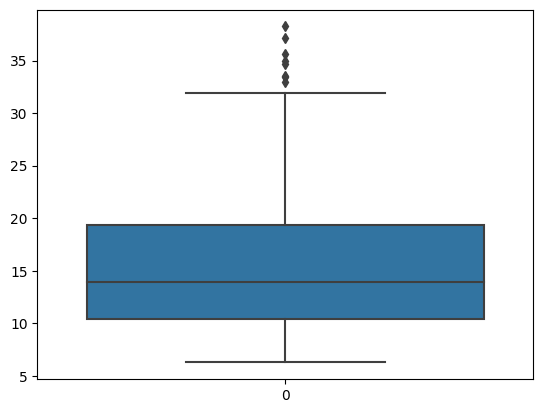

In [7]:
sns.boxplot(df.Na_to_K)

In [8]:
quantile = df.Na_to_K.quantile(0.99)
print(quantile)

35.65448999999999


In [10]:
df = df[df.Na_to_K<=quantile]

<Axes: >

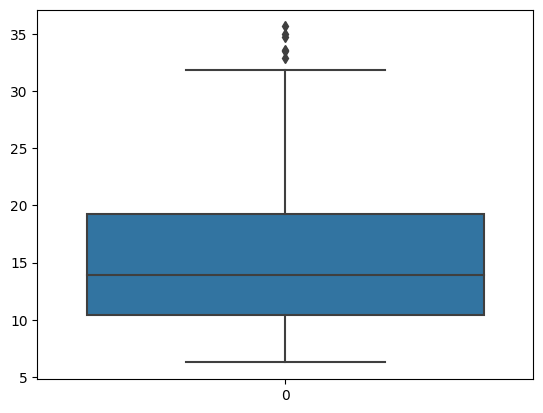

In [11]:
sns.boxplot(df.Na_to_K)

In [12]:
df.shape

(198, 6)

In [13]:
q1 = df.Na_to_K.quantile(0.25)
q3 = df.Na_to_K.quantile(0.75)
iqr = q3 - q1
print(iqr)

8.770999999999997


In [14]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
df.median()

<ipython-input-14-153c270c9e68>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9345
dtype: float64

<Axes: >

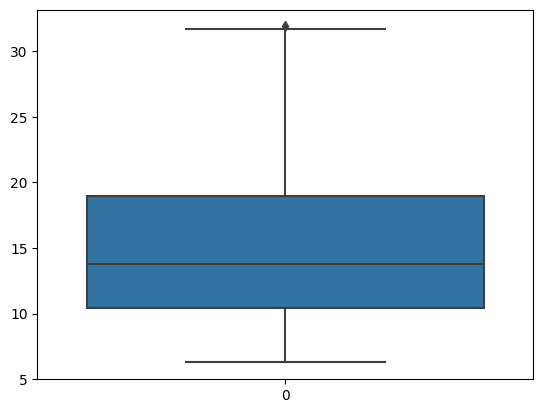

In [15]:
df['Na_to_K'] = np.where(df['Na_to_K']>upper_limit,13.768,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [16]:
a = df.iloc[:,0:5]
a.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [17]:
x = df['Drug']
x.head(5)

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [18]:
x = pd.DataFrame(x)
x.head(5)

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [19]:
from sklearn.model_selection import train_test_split
a_train,a_test,x_train,x_test = train_test_split(a,x,test_size=0.3,random_state=10)

In [20]:
a.shape

(198, 5)

In [21]:
a_train.shape, a_test.shape

((138, 5), (60, 5))

In [22]:
x.shape

(198, 1)

In [23]:
x_train.shape, x_test.shape

((138, 1), (60, 1))

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['Drug'])

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0, 1,
       4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4, 0,
       3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 4, 4, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4, 4, 4])

In [25]:
a_train['Na_to_K'] = label_encoder.fit_transform(a_train['Na_to_K'])
a_train['Na_to_K']

118     30
104    127
153     71
121     90
83      44
      ... 
114     15
64      58
15      80
126     84
9      103
Name: Na_to_K, Length: 138, dtype: int64

In [26]:
a_test['Na_to_K'] = label_encoder.fit_transform(a_test['Na_to_K'])
a_test['Na_to_K']

59     42
5       6
20     46
194    34
52     56
19     53
161    10
55     37
69     50
2      14
106    25
10     22
75     48
162    28
177    45
63      5
178    38
78     33
120    55
95     21
149     4
129     1
61      9
166    54
125    52
191     3
135    24
1      31
47     15
171    11
192    39
39      8
76     18
90     40
35      0
115    41
198    36
168    49
46     30
173    43
190    44
7      17
26     58
137    29
58     13
72     16
103     7
199    20
56     19
81      2
24     34
43     26
174    27
139    12
21     51
60     57
100    23
70     35
102    32
49     47
Name: Na_to_K, dtype: int64

In [27]:
a_train['Sex'] = label_encoder.fit_transform(a_train['Sex'])
a_train['Sex']

118    0
104    1
153    0
121    1
83     0
      ..
114    0
64     0
15     0
126    1
9      1
Name: Sex, Length: 138, dtype: int64

In [28]:
a_test['Sex'] = label_encoder.fit_transform(a_test['Sex'])
a_test['Sex']

59     1
5      0
20     1
194    0
52     1
19     0
161    0
55     0
69     0
2      1
106    1
10     0
75     1
162    1
177    1
63     1
178    1
78     0
120    1
95     1
149    1
129    0
61     1
166    0
125    0
191    1
135    1
1      1
47     1
171    1
192    1
39     1
76     0
90     1
35     1
115    1
198    1
168    0
46     0
173    0
190    1
7      1
26     1
137    0
58     1
72     0
103    1
199    0
56     1
81     1
24     0
43     1
174    1
139    0
21     1
60     0
100    1
70     1
102    0
49     0
Name: Sex, dtype: int64

In [30]:
a_train['BP'] = label_encoder.fit_transform(a_train['BP'])
a_train['BP']

118    0
104    0
153    1
121    0
83     0
      ..
114    2
64     0
15     0
126    0
9      1
Name: BP, Length: 138, dtype: int64

In [31]:
a_test['BP'] = label_encoder.fit_transform(a_test['BP'])
a_test['BP']

59     0
5      2
20     1
194    0
52     1
19     0
161    0
55     1
69     0
2      1
106    2
10     1
75     1
162    2
177    2
63     1
178    2
78     0
120    2
95     1
149    1
129    2
61     0
166    1
125    0
191    0
135    1
1      1
47     1
171    1
192    1
39     2
76     0
90     2
35     2
115    0
198    2
168    1
46     0
173    1
190    0
7      1
26     0
137    0
58     2
72     2
103    2
199    1
56     0
81     2
24     1
43     2
174    0
139    2
21     2
60     1
100    0
70     0
102    1
49     1
Name: BP, dtype: int64

In [32]:
a_train['Cholesterol'] = label_encoder.fit_transform(a_train['Cholesterol'])
a_train['Cholesterol']

118    1
104    1
153    1
121    1
83     1
      ..
114    1
64     0
15     1
126    0
9      1
Name: Cholesterol, Length: 138, dtype: int64

In [33]:
a_test['Cholesterol'] = label_encoder.fit_transform(a_test['Cholesterol'])
a_test['Cholesterol']

59     0
5      0
20     1
194    0
52     1
19     1
161    1
55     0
69     1
2      0
106    0
10     0
75     1
162    1
177    0
63     1
178    0
78     0
120    0
95     1
149    0
129    0
61     1
166    0
125    1
191    0
135    1
1      0
47     0
171    1
192    0
39     0
76     0
90     0
35     1
115    0
198    1
168    1
46     0
173    1
190    0
7      0
26     0
137    0
58     1
72     0
103    0
199    1
56     1
81     0
24     0
43     0
174    1
139    0
21     0
60     1
100    1
70     0
102    0
49     0
Name: Cholesterol, dtype: int64

In [34]:
x_train['Drug'] = label_encoder.fit_transform(x_train['Drug'])
x_train['Drug']

118    1
104    0
153    4
121    0
83     1
      ..
114    4
64     2
15     0
126    0
9      0
Name: Drug, Length: 138, dtype: int64

In [35]:
a_train

,Age,Sex,BP,Cholesterol,Na_to_K
118,32,0,0,1,30
104,22,1,0,1,127
153,72,0,1,1,71
121,15,1,0,1,90
83,38,0,0,1,44
...,...,...,...,...,...
114,20,0,2,1,15
64,60,0,0,0,58
15,16,0,0,1,80
126,66,1,0,0,84


In [36]:
x_train

,Drug
118,1
104,0
153,4
121,0
83,1
...,...
114,4
64,2
15,0
126,0


In [37]:
# Task - 2 
# Build the ANN model with (input layer, min 3 hidden layers & output layer)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

reg_model = Sequential()
reg_model.add(Dense(4,activation='relu'))
reg_model.add(Dense(64,activation='relu'))
reg_model.add(Dense(32,activation='relu'))
reg_model.add(Dense(32,activation='relu'))
reg_model.add(Dense(1,activation='linear'))

In [38]:
reg_model.compile(optimizer='adam', loss='mse')

In [39]:
reg_model.fit(a_train,x_train,batch_size=5, epochs=10)

Epoch 1/10
28/28 [==============================] - 1s 1ms/step - loss: 4.6339
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 3.1531
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 2.9374
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 3.0021
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 2.5031
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 2.4275
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 2.6426
Epoch 8/10
28/28 [==============================] - 0s 1ms/step - loss: 2.3831
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 2.2575
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 2.2448


In [41]:
# Task - 3
# Test the model with random data

reg_model.predict([[55,0,12,7,65]])

1/1 [==============================] - 0s 27ms/step


array([[2.8178947]], dtype=float32)